In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [242]:
# specify default options for Pandas library
pd.set_option('display.max_rows', 10) # показывать больше строк
pd.set_option('display.max_columns', 15) # показывать больше колонок

In [243]:
cacao = pd.read_csv('../data/cacao_flavors.xls', sep=',')
cacao

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [244]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [245]:
cacao.columns = [col.lower().replace('\n', '_').replace(' ', '_') for col in cacao.columns]

cacao.rename(columns={'company__(maker-if_known)': 'company',
              'specific_bean_origin_or_bar_name': 'specific_origin',
              'broad_bean_origin': 'broad_origin'}, inplace=True)

In [246]:
cacao.rename(columns={'company__(maker-if_known)': 'company',
              'specific_bean_origin_or_bar_name': 'specific_origin',
              'broad_bean_origin': 'broad_origin'}, inplace=True)

In [247]:
cacao.columns

Index(['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin'],
      dtype='object')

In [248]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bar_id            1795 non-null   int64  
 1   company           1795 non-null   object 
 2   specific_origin   1795 non-null   object 
 3   ref               1795 non-null   int64  
 4   review_date       1795 non-null   int64  
 5   cocoa_percent     1795 non-null   object 
 6   company_location  1795 non-null   object 
 7   rating            1795 non-null   float64
 8   bean_type         1794 non-null   object 
 9   broad_origin      1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


### bar_id column

In [249]:
cacao.bar_id.nunique()

1795

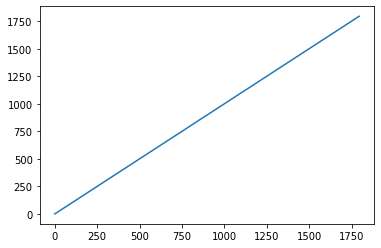

In [250]:
cacao.bar_id.plot();

Тут все просто: это столбец индексов батончиков, количество уникальных значений соответствует количеству строк. Вряд ли он пригодится для дальнейшего анализа, удалим его.

In [251]:
cacao.drop(['bar_id'], inplace=True, axis=1)

In [252]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1795 non-null   object 
 1   specific_origin   1795 non-null   object 
 2   ref               1795 non-null   int64  
 3   review_date       1795 non-null   int64  
 4   cocoa_percent     1795 non-null   object 
 5   company_location  1795 non-null   object 
 6   rating            1795 non-null   float64
 7   bean_type         1794 non-null   object 
 8   broad_origin      1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


### company column

In [253]:
cacao.company.nunique()

408

In [254]:
cacao.company.unique()

array(['A. Morin', '\xa0', 'Acalli', 'Adi', 'Aequare (Gianduja)',
       'Ah Cacao', "Akesson's (Pralus)", 'Alain Ducasse', 'Alexandre',
       'Altus aka Cao Artisan', 'Amano', 'Amatller (Simon Coll)',
       'Amazona', 'Ambrosia', 'Amedei', 'AMMA', 'Anahata', 'Animas',
       'Ara', 'Arete', 'Artisan du Chocolat',
       'Artisan du Chocolat (Casa Luker)', 'Askinosie', 'Bahen & Co.',
       'Bakau', 'Bar Au Chocolat', "Baravelli's", 'Batch', 'Beau Cacao',
       'Beehive', 'Belcolade', 'Bellflower', 'Belyzium', 'Benoit Nihant',
       'Bernachon', 'Beschle (Felchlin)', 'Bisou', 'Bittersweet Origins',
       'Black Mountain', 'Black River (A. Morin)', 'Blanxart',
       'Blue Bandana', 'Bonnat', 'Bouga Cacao (Tulicorp)', 'Bowler Man',
       "Brasstown aka It's Chocolate", 'Brazen', 'Breeze Mill', 'Bright',
       'Britarev', 'Bronx Grrl Chocolate', 'Burnt Fork Bend',
       'Cacao Arabuco', 'Cacao Atlanta', 'Cacao Barry', 'Cacao de Origen',
       'Cacao de Origin', 'Cacao Hunters', 

In [255]:
cacao.company.value_counts()

                                          99
Soma                                      45
Fresco                                    26
Bonnat                                    26
Pralus                                    25
                                          ..
Metropolitan                               1
Heirloom Cacao Preservation (Fruition)     1
Two Ravens                                 1
Oialla by Bojessen (Malmo)                 1
Anahata                                    1
Name: company, Length: 408, dtype: int64

In [256]:
cacao.query("company == '\xa0'")

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
8,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
16,,Papua New Guinea,1015,2013,70%,France,3.25,,Papua New Guinea
67,,"LamasdelChanka, San Martin, Oro Verde coop",1145,2013,72%,Peru,3.25,,Peru
78,,Chuao,111,2007,70%,Italy,5.00,Trinitario,Venezuela
108,,Phantom,1924,2016,70%,U.S.A.,4.00,Forastero (Nacional),Peru
...,...,...,...,...,...,...,...,...,...
1721,,"Los Rios, Rancho Grande 2004/2007",153,2007,90%,U.S.A.,2.00,Forastero (Arriba),Ecuador
1746,,Rio Caribe,457,2009,72%,U.K.,3.25,Trinitario,Venezuela
1747,,"Guasare, Zulia Prov., 2015, batch 124",1912,2016,74%,U.S.A.,3.00,Criollo,Venezuela
1755,,Sambirano,951,2012,70%,U.S.A.,3.25,Trinitario,Madagascar


We have found the following problems with the column:
1. there are some empty string - '\xa0' in the amount of 99 rows.

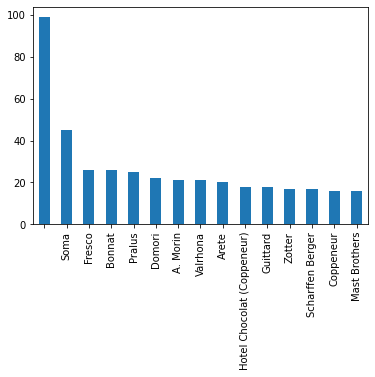

In [257]:
cacao.company.value_counts()[:15].plot(kind='bar');

In [258]:
# remove empty companies
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [259]:
cacao.company.value_counts()

Soma                                      45
Bonnat                                    26
Fresco                                    26
Pralus                                    25
Domori                                    22
                                          ..
Ah Cacao                                   1
Heirloom Cacao Preservation (Fruition)     1
Two Ravens                                 1
Bronx Grrl Chocolate                       1
Anahata                                    1
Name: company, Length: 407, dtype: int64

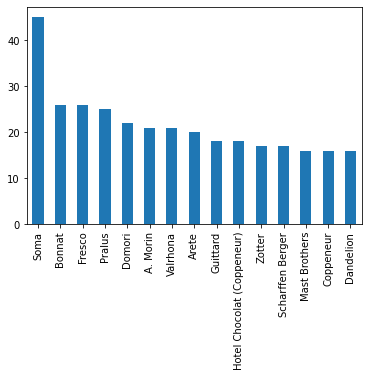

In [260]:
cacao.company.value_counts()[:15].plot(kind='bar');

In [261]:
# take only that company that have the more than 10 products
len(cacao.company.value_counts()[cacao.company.value_counts() > 10].index)#.to_list()

30

### specific_origin column

In [262]:
cacao.specific_origin.nunique()

1013

In [263]:
cacao.specific_origin.value_counts()

                                    58
Madagascar                          55
Peru                                44
Ecuador                             39
Dominican Republic                  33
                                    ..
Dual Origins, Sambirano, Elvesia     1
Carupano, H. San Jose                1
Le Chocolat Chaud                    1
Tome Acu E., Amazon Rainforest       1
Lachua w/ cane sugar                 1
Name: specific_origin, Length: 1013, dtype: int64

In [264]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)

In [265]:
cacao.specific_origin.value_counts()
cacao.specific_origin.value_counts()[cacao.specific_origin.value_counts() > 10]

Madagascar            55
Peru                  44
Ecuador               39
Dominican Republic    33
Venezuela             21
                      ..
Belize                13
Bolivia               12
Tanzania              11
La Red                11
Brazil                11
Name: specific_origin, Length: 15, dtype: int64

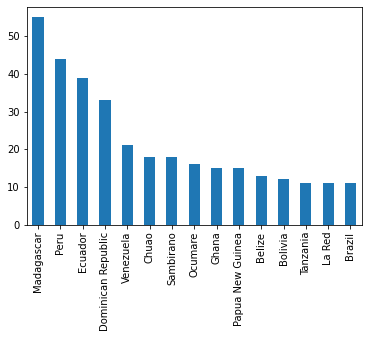

In [266]:
cacao.specific_origin.value_counts()[:15].plot(kind='bar');

### ref column

<AxesSubplot:>

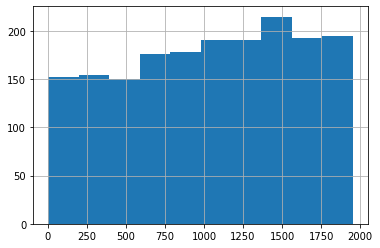

In [267]:
cacao.ref.hist()

In [268]:
cacao.ref.describe()

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

1. uniform distribution;
2. no outliers;
3. the number of reviews grows in time.

### review_date column

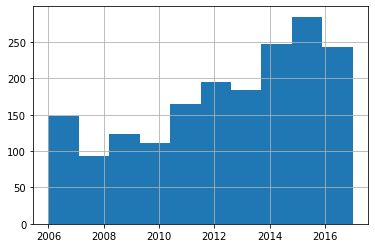

In [269]:
cacao.review_date.hist();

In [270]:
cacao.review_date.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

<AxesSubplot:ylabel='review_date'>

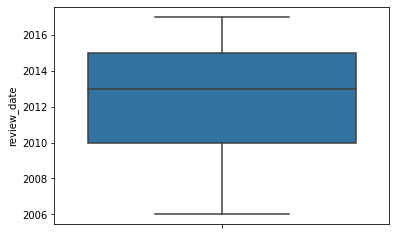

In [271]:
sns.boxplot(data=cacao, y='review_date')

<AxesSubplot:>

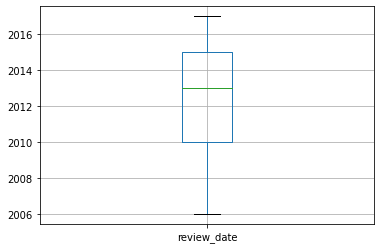

In [272]:
cacao.boxplot(column='review_date')

1. the number of reviews grows in time.

### cocoa_percent column

In [273]:
cacao.cocoa_percent.nunique()

59

In [274]:
cacao.cocoa_percent.value_counts()

70%     664
75%     219
72%     189
65%      77
80%      70
       ... 
53%       1
576%      1
470%      1
682%      1
570%      1
Name: cocoa_percent, Length: 59, dtype: int64

In [275]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

it's better to replace the percent sign to the numerical values.

In [276]:
cacao.cocoa_percent = cacao.cocoa_percent.str.replace('%', '').astype('float')

In [277]:
cacao.cocoa_percent

0        63.0
1        70.0
2       670.0
3        70.0
4        70.0
        ...  
1790     70.0
1791     65.0
1792     65.0
1793     62.0
1794     65.0
Name: cocoa_percent, Length: 1795, dtype: float64

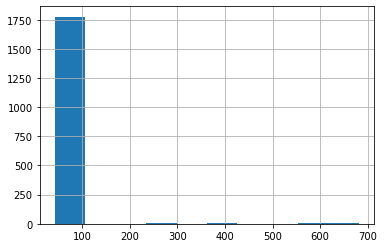

In [278]:
cacao.cocoa_percent.hist();

In [279]:
cacao.cocoa_percent.describe()

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

<AxesSubplot:>

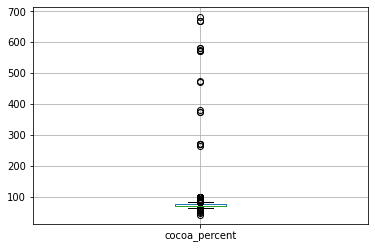

In [280]:
cacao.boxplot(column='cocoa_percent')

In [281]:
# we need to filter outliers using the following formula:
# [percentile(25) -1.5*IQR : percentile(75)+1.5*IQR]
# firstly, let's find the IQR, Q1 and Q3 and ranges for the filtering
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)

ranges = [perc25 - 1.5*IQR, perc75 + 1.5*IQR]
ranges

[62.5, 82.5]

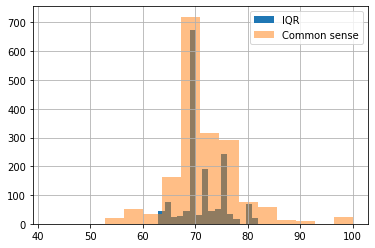

In [282]:
cacao[cacao.cocoa_percent.between(*ranges)].cocoa_percent.hist(bins=16, label='IQR');
cacao[cacao.cocoa_percent <= 100].cocoa_percent.hist(bins=16, label='Common sense', alpha=0.5);
plt.legend();

IQR removes a lot of our values - therefore, we'll just use a common sense in this case and remove all percents that are larger than 100.

In [283]:
cacao = cacao[cacao.cocoa_percent <= 100]

### company_location column

In [284]:
cacao.company_location.value_counts()

U.S.A.        756
France        155
Canada        124
U.K.           94
Italy          63
             ... 
Eucador         1
India           1
Ghana           1
Martinique      1
Russia          1
Name: company_location, Length: 60, dtype: int64

In [285]:
cacao.company_location.value_counts()[cacao.company_location.value_counts() > 10]

U.S.A.         756
France         155
Canada         124
U.K.            94
Italy           63
              ... 
New Zealand     17
Madagascar      17
Peru            17
Denmark         15
Vietnam         11
Name: company_location, Length: 22, dtype: int64

In [286]:
cacao.loc[:, ['company_location']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


### rating column

In [287]:
cacao.loc[:, ['rating']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  1776 non-null   float64
dtypes: float64(1)
memory usage: 27.8 KB


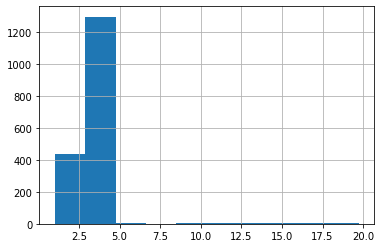

In [288]:
cacao.rating.hist();

<AxesSubplot:>

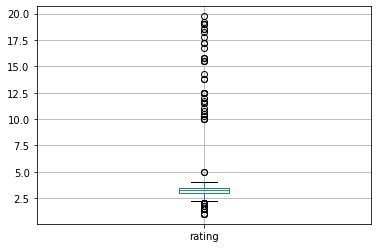

In [289]:
cacao.boxplot('rating')

<AxesSubplot:xlabel='rating'>

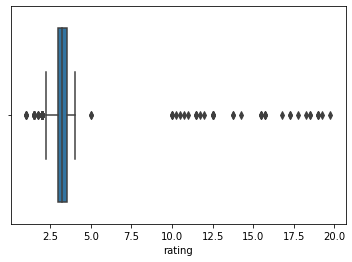

In [290]:
sns.boxplot(data=cacao, x='rating')

In [291]:
cacao.rating.describe()

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

In [292]:
# we need to filter outliers using the following formula:
# [percentile(25) -1.5*IQR : percentile(75)+1.5*IQR]
# firstly, let's find the IQR, Q1 and Q3 and ranges for the filtering
IQR_rating = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25_rating = cacao.rating.quantile(0.25)
perc75_rating = cacao.rating.quantile(0.75)

ranges_rating = [perc25_rating - 1.5*IQR_rating, perc75_rating + 1.5*IQR_rating]
ranges_rating

[2.25, 4.25]

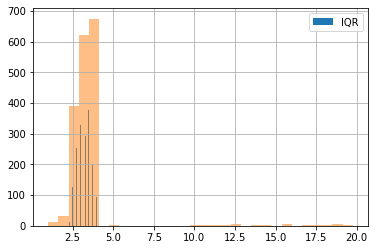

In [293]:
cacao[cacao.rating.between(*ranges_rating)].rating.hist(label='IQR', bins=30);
cacao.rating.hist(alpha=0.5, bins=30);
# cacao[cacao.rating <= 100].rating.hist(bins=16, label='Common sense', alpha=0.5);
plt.legend();

Этот способ позволил нам отобрать экстремально низкие и экстремально высокие оценки. Отфильтруем данные:

In [294]:
cacao = cacao[cacao.rating.between(*ranges_rating)]

### bean_type column

In [295]:
cacao.loc[:, ['bean_type']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [296]:
cacao.bean_type.value_counts()

                           829
Trinitario                 401
Criollo                    147
Forastero                   81
Forastero (Nacional)        50
                          ... 
Amazon                       1
Criollo, +                   1
Criollo (Ocumare 77)         1
Forastero(Arriba, CCN)       1
Blend-Forastero,Criollo      1
Name: bean_type, Length: 41, dtype: int64

In [298]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if str(x).strip() == '' else x)

In [300]:
cacao.bean_type.value_counts()

Trinitario                 401
Criollo                    147
Forastero                   81
Forastero (Nacional)        50
Criollo, Trinitario         37
                          ... 
Trinitario (Amelonado)       1
Criollo (Ocumare)            1
Criollo (Ocumare 67)         1
Criollo (Wild)               1
Blend-Forastero,Criollo      1
Name: bean_type, Length: 40, dtype: int64

In [301]:
cacao.bean_type.value_counts()[cacao.bean_type.value_counts() > 10]

Trinitario              401
Criollo                 147
Forastero                81
Forastero (Nacional)     50
Criollo, Trinitario      37
Blend                    36
Forastero (Arriba)       30
Name: bean_type, dtype: int64

In [302]:
cacao.loc[:, ['bean_type']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [303]:
cacao.bean_type.nunique()

41

In [307]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [308]:
cacao.loc[:, ['bean_type']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [309]:
cacao.bean_type.value_counts()

Trinitario                 405
Forastero                  179
Criollo                    165
Criollo, Trinitario         37
Blend                       36
                          ... 
Criollo, +                   1
CCN51                        1
Trinitario, TCGA             1
Trinitario, Nacional         1
Blend-Forastero,Criollo      1
Name: bean_type, Length: 21, dtype: int64

### broad_origin column

In [311]:
cacao.broad_origin.value_counts()

Venezuela                202
Ecuador                  179
Peru                     159
Madagascar               138
Dominican Republic       135
                        ... 
Carribean(DR/Jam/Tri)      1
Venezuela, Trinidad        1
Venezuela/ Ghana           1
Venezuela, Carribean       1
PNG, Vanuatu, Mad          1
Name: broad_origin, Length: 97, dtype: int64

In [312]:
cacao.loc[:, ['broad_origin']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [313]:
cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if str(x).strip() == '' else x)

In [314]:
cacao.broad_origin.value_counts()

Venezuela                202
Ecuador                  179
Peru                     159
Madagascar               138
Dominican Republic       135
                        ... 
Carribean(DR/Jam/Tri)      1
Venezuela, Trinidad        1
Venezuela/ Ghana           1
Venezuela, Carribean       1
Dom. Rep., Madagascar      1
Name: broad_origin, Length: 96, dtype: int64

In [315]:
cacao.broad_origin.value_counts()[cacao.broad_origin.value_counts() > 10]

Venezuela             202
Ecuador               179
Peru                  159
Madagascar            138
Dominican Republic    135
                     ... 
Jamaica                18
Indonesia              16
Grenada                16
Honduras               15
Cuba                   11
Name: broad_origin, Length: 25, dtype: int64

In [316]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [317]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries)

In [318]:
cacao.broad_origin.value_counts()

Venezuela                            202
Ecuador                              179
Peru                                 160
Madagascar                           138
DominicanRepublic                    135
                                    ... 
Cameroon                               1
Madagascar,Java,PapuaNewGuinea         1
DomincanRepublic,Ecuador,Peru          1
PapuaNewGuinea,Vanuatu,Madagascar      1
SouthAmerica,Africa                    1
Name: broad_origin, Length: 93, dtype: int64

In [319]:
cacao.broad_origin.unique()

array(['Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama', 'Madagascar',
       'Brazil', 'Ecuador', 'Colombia', 'Burma', 'PapuaNewGuinea',
       'Bolivia', 'Fiji', 'Mexico', 'Indonesia', 'Trinidad', 'Vietnam',
       'Nicaragua', 'Tanzania', 'DominicanRepublic', 'Ghana', 'Belize',
       None, 'Jamaica', 'Honduras', 'CostaRica', 'Guatemala', 'Haiti',
       'Congo', 'Philippines', 'DomincanRepublic', 'Madagascarlaysia',
       'DomincanRepublic,Bali', 'Venezuela,Africa,Brasil,Peru,Mexico',
       'Gabon', 'IvoryCoast', 'Carribean', 'SriLanka', 'PuertoRico',
       'Grenada', 'SaoTome', 'Uganda', 'Madagascarrtinique',
       'SaoTome,Principe', 'Vanuatu', 'Australia', 'Liberia',
       'Ecuador,CostaRica', 'WestAfrica', 'Hawaii', 'St.Lucia',
       'CostRica,Venezuela', 'Peru,Madagascar', 'Venezuela,Trinidad',
       'Trinidad,Tobago', 'Venezuela,Trinidad,Ecuador',
       'SouthAmerica,Africa', 'India', 'Africa,Carribean,C.Am.',
       'Trinidad-Tobago', 'Peru,Ecuador,Venezuela',
       'V

## Correlation analysis

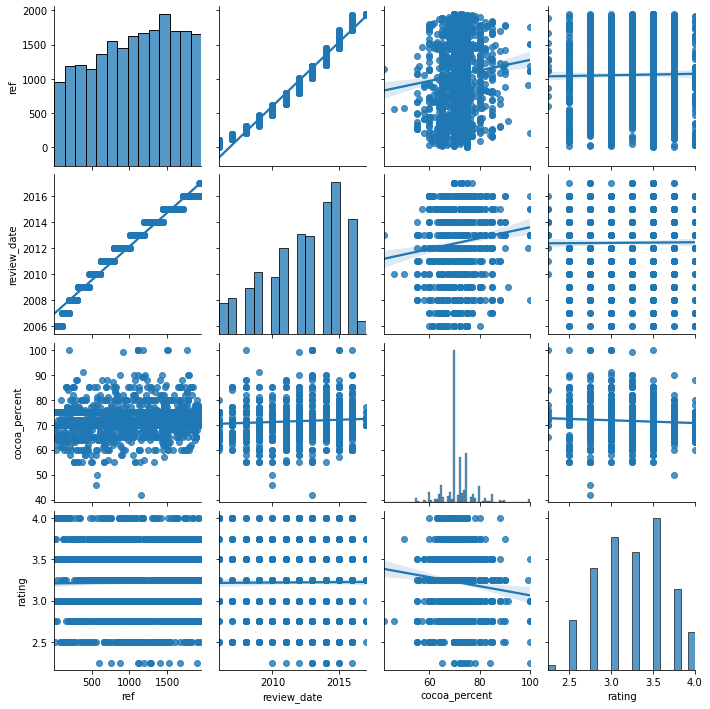

In [321]:
sns.pairplot(cacao, kind='reg');

In [322]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


Так как переменные review_date и ref скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная REF.

Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.

Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются.

In [323]:
cacao.drop(labels='ref', inplace=True, axis=1)

In [324]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1596 non-null   object 
 1   specific_origin   1637 non-null   object 
 2   review_date       1690 non-null   int64  
 3   cocoa_percent     1690 non-null   float64
 4   company_location  1690 non-null   object 
 5   rating            1690 non-null   float64
 6   bean_type         860 non-null    object 
 7   broad_origin      1630 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 118.8+ KB


In [325]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

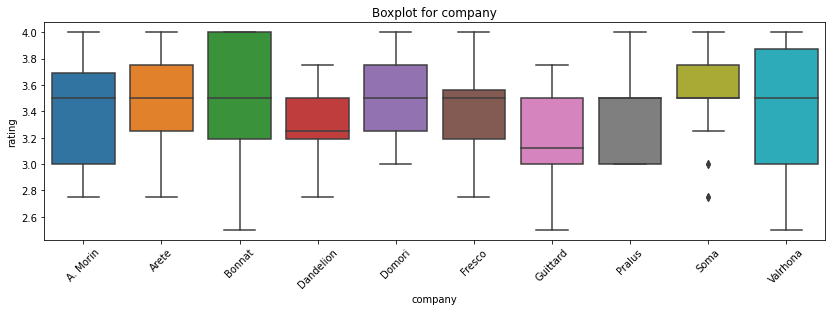

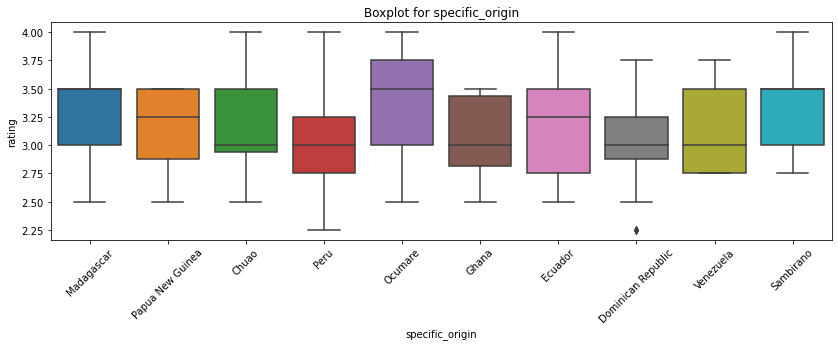

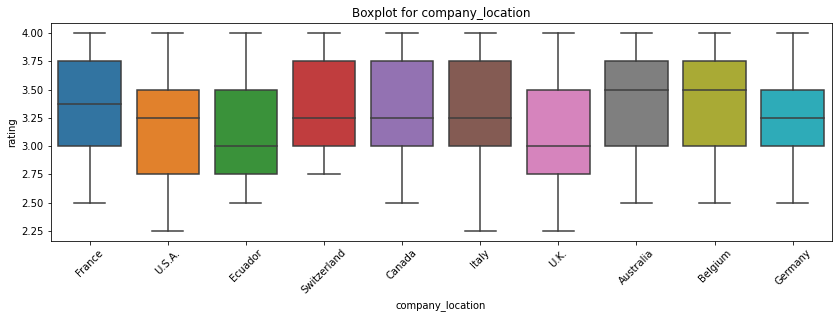

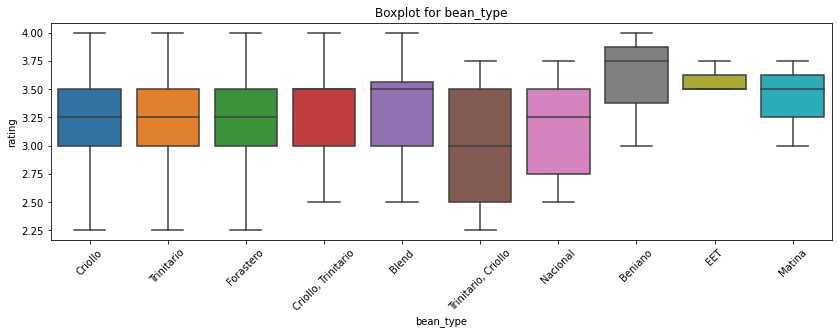

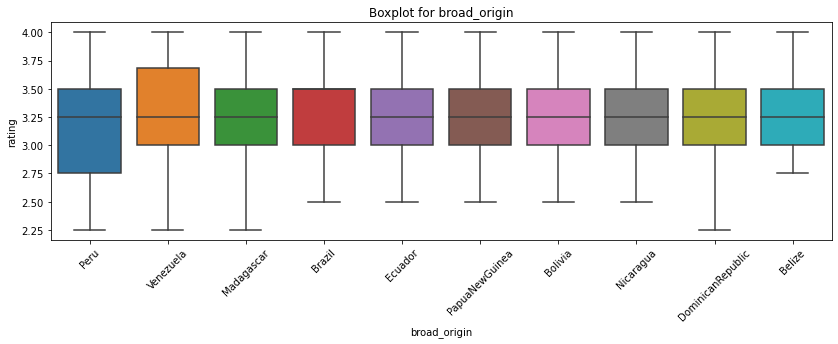

In [326]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме broad_origin, могут влиять на оценку батончика. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [332]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(
            cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
            cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print(f'Найдены статистически значимые различия для колонки {column}.')
            break

In [333]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company.
Найдены статистически значимые различия для колонки specific_origin.
Найдены статистически значимые различия для колонки company_location.


Как мы видим, серьёзно отличаются три параметра: company,  specific_origin и  company_location. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: company, specific_origin, company_location, review_date, cocoa_percent.

In [334]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0
